In [1]:
import ipyvolume.pylab as p3
import numpy as np
import h5py
import matplotlib.cm


colormap = matplotlib.cm.jet_r

def time2color(ts, tmin = -1, tmax = -1):
    if tmin == -1:
        tmin = np.min(ts[ts>0])
    if tmax == -1:
        tmax = np.max(ts)
    delta_t = tmax - tmin
    c = []
    for t in ts:
        if t<tmin:
            col = 0.
        elif t> tmax:
            col =1.
        else:
            col = ((t-tmin)/delta_t)
        c.append(colormap(col)[:3])
    return c

def normalize(arr, on_max=3.):
    amax = np.max(arr[arr>0])
    return [(1.4+on_max*x/amax)  if x>0. else 0 for x in arr]

In [2]:
file="/home/pablo/github/DeepIceLearning/h5_final3/File_307.h5"
idata = h5py.File(file,'r')

In [3]:
#len(idata['reco_vals']['hitDOMs'])

In [4]:
#idata = h5py.File('../data/File_981.h5')
#print np.argsort(idata['reco_vals']['hitDOMs'])[740:760]

In [5]:
key = 'IC_time_first'
ckey = 'IC_charge'
ev_number = 22 # 96 #1360
if key in idata.keys():
    plt_data = idata[key][ev_number]
    charge = idata[ckey][ev_number] 
else:
    print(idata.keys())

In [6]:
print(idata.filename)

/home/pablo/github/DeepIceLearning/h5_final3/File_307.h5


In [7]:
print(np.min(plt_data[plt_data>0]))
print(np.max(plt_data))

5.0
16694.0


In [8]:
uni = lambda a : int(np.random.uniform(a))

In [9]:
A=[]
number_eliminated=70
probability_el_row=10  #1=10% 2=20% 10=100%
for i in range(10):
    for j in range(10):
        for k in range(60):
            A.append(([i,j,k]))
Eliminated_doms=[A[i] for i in np.random.choice(6000,number_eliminated,replace=False)]
if (np.random.uniform(0,10)<probability_el_row):
    a,b=uni(10),uni(10)
    Eliminated_doms = Eliminated_doms + [[a,b,k] for k in range(60)]  #just append

for dom in Eliminated_doms:
    #print(dom[0],dom[1],dom[2])
    charge[dom[0],dom[1],dom[2]]=100
    plt_data[dom[0],dom[1],dom[2]]=100


In [10]:
[[uni(10),uni(10),uni(10)] for _ in range(10)]

[[7, 4, 6],
 [1, 7, 4],
 [3, 6, 4],
 [2, 2, 5],
 [2, 2, 1],
 [8, 3, 7],
 [3, 3, 7],
 [7, 2, 2],
 [9, 4, 9],
 [9, 1, 3]]

In [11]:
np.append()

TypeError: _append_dispatcher() missing 2 required positional arguments: 'arr' and 'values'

In [12]:
ishape = np.shape(plt_data)
xi, yi , zi = np.meshgrid(1.*np.arange(ishape[0]), 1.*np.arange(ishape[1]), 1.*np.arange(ishape[2]))

In [399]:
x_ic = np.hstack(np.hstack(xi))
y_ic = np.hstack(np.hstack(yi))
z_ic = np.hstack(np.hstack(zi))
c_arr = np.concatenate([charge[int(x_ic[i])][int(y_ic[i])][int(z_ic[i])] for i in range(len(x_ic))])
s_ic = normalize(c_arr)
c_col = time2color([1.*plt_data[int(x_ic[i])][int(y_ic[i])][int(z_ic[i])][0] for i in range(len(x_ic))],
                   tmin = 10000, tmax =12000)

In [400]:
#idata.keys()
#idata["reco_vals"]

In [401]:
print('Event Type {}'.format(idata['reco_vals'][ev_number]['classification']))
#print('Run ID {}'.format(idata['reco_vals'][ev_number]['RunID']))
#print('Event ID {}'.format(idata['reco_vals'][ev_number]['EventID']))

Event Type 5.0


In [402]:
p3.clear()
p3.scatter(x_ic, y_ic, z_ic, size=0.2, alpha = 0.2, marker="sphere", color = 'grey')
p3.scatter(x_ic, y_ic, z_ic, size=s_ic, marker="sphere", color = c_col)
p3.show()

In [403]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

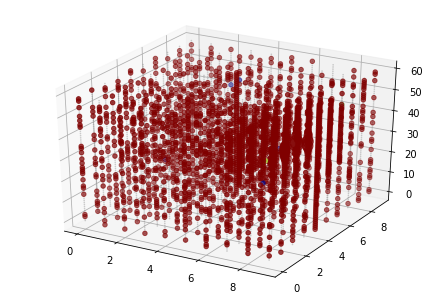

In [404]:
fig = plt.figure(1)
ax =Axes3D(fig)
ax.scatter(x_ic[::], y_ic[::], z_ic[::-1], c = 'Grey', s = 0.5, alpha=0.3)
ax.scatter(x_ic[::], y_ic[::], z_ic[::-1], c = c_col, s = 10*np.array(s_ic)**2)
plt.savefig('event.png')
plt.show()

In [394]:
# is a good number to eliminate for this rataset 10 active doms
#take sometimes out a string.
#i3 live check a few physics run 

In [395]:
t0=[]
Doms=np.random.choice(range(6000),200,replace=False)
for a in range(600): 
    eliminate=np.random.choice(range(6000),70,replace=False) #np.array([uni(6000) for i in range(600)])
    
    coincidences=0
    for i in Doms:
        for t in eliminate:
            if (i==t):
                #print("!")
                coincidences+=1
    #print(coincidences)
    t0.append(int(coincidences))
t0=np.array(t0)

In [396]:
#plt.bar(t0,6)

(array([ 48., 148., 157., 109.,   0.,  80.,  35.,  14.,   8.,   1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

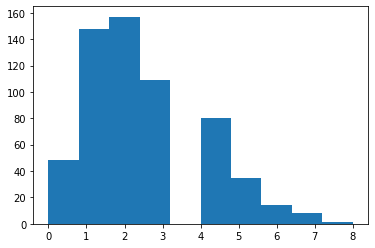

In [20]:
plt.hist(t0)

In [21]:
np.sum(charge!=0)

268

In [22]:
RDoms=[]
for i in range(70):
    key = 'IC_time_first'
    ckey = 'IC_charge'
    ev_number = i # 96 #1360
    if key in idata.keys():
        plt_data = idata[key][ev_number]
        charge = idata[ckey][ev_number] 
    else:
        print(idata.keys())
    RDoms.append(np.sum(charge!=0))
RDoms=np.array(RDoms)

(array([30., 17., 11.,  5.,  2.,  1.,  3.,  0.,  0.,  1.]),
 array([  32.,  129.,  226.,  323.,  420.,  517.,  614.,  711.,  808.,
         905., 1002.]),
 <a list of 10 Patch objects>)

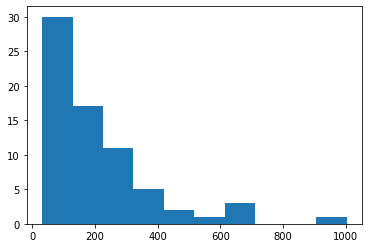

In [23]:
plt.hist(RDoms)

In [249]:
np.average(RDoms)

207.65714285714284